In [1]:
import joblib
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
modelpath = '/home/hartmank/braindecode/data/models/'
modelname = 'paper/ours/cnt/deep4/car/%d'
savepath  = '/home/hartmank/data/convvisual/RF_data_paper/'
folder = 'FilterAnalysis_nUnits100'

In [3]:
subjects = [22,31,36,37,38]
layers = [3,4,10,16,22,28]
labels = ['FFT','FFTc','Phase','Phasec','Mean','Meanc','Power']

In [4]:
KS_perc_sum = np.zeros((5,6,7))
KS_perc_mean = np.zeros((5,6,7))
KS_perc_max = np.zeros((5,6,7))
for i,subj in enumerate(subjects):
    path = os.path.join(savepath,'figures',str(subj),folder)
    KS_perc_sum[i] = joblib.load(os.path.join(path,'KS_percentages_sum')).squeeze().T
    KS_perc_mean[i] = joblib.load(os.path.join(path,'KS_percentages_mean')).squeeze().T
    KS_perc_max[i] = joblib.load(os.path.join(path,'KS_percentages_max')).squeeze().T

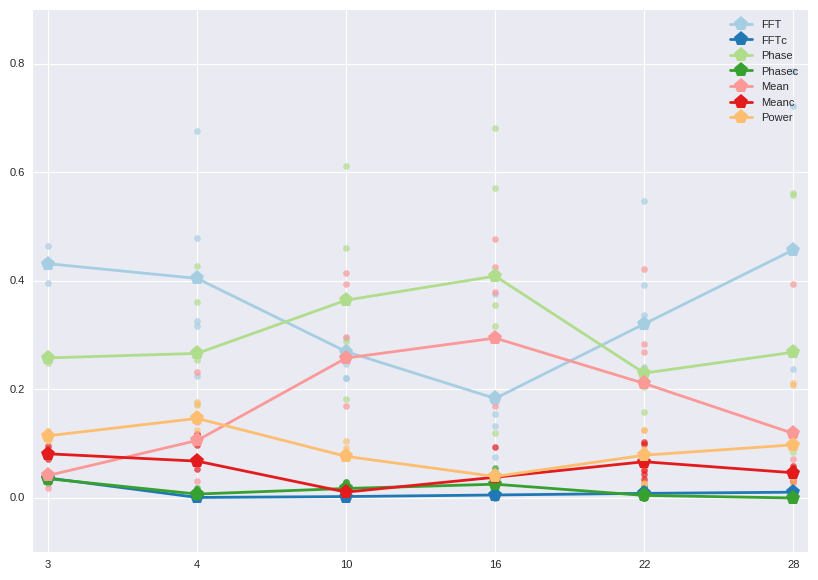

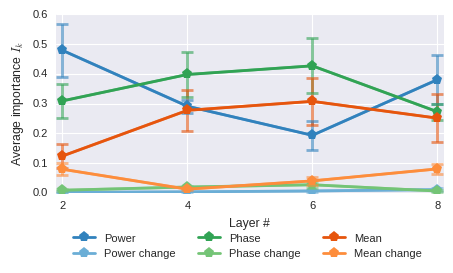

In [14]:
sns.set_context("paper")

plt.figure(figsize=(10,7))
colors = sns.color_palette("Paired",7)
for i in xrange(KS_perc_sum.shape[2]):
    plt.plot(KS_perc_sum[:,:,i].mean(axis=0),label=labels[i],color=colors[i],linewidth=2,linestyle='-',marker="p",markersize=11)
    plt.scatter(np.matlib.repmat(range(KS_perc_sum.shape[1]),5,1),KS_perc_sum[:,:,i],color=colors[i],alpha=0.7)
plt.xticks(range(6),layers)
plt.legend()
plt.xlim(-0.1,5.1)
plt.show()

labels_ = ['Power','Power change','Phase','Phase change','Mean','Mean change']
plt.figure(figsize=(5,2.3))
colors = ['#3182bd','#6baed6','#31a354','#74c476','#e6550d','#fd8d3c']
KS_perc_sum_new = np.copy(KS_perc_sum[:,:,:6])
scaler = 1/KS_perc_sum_new.sum(axis=2)
for i in xrange(KS_perc_sum_new.shape[2]):
    KS_perc_sum_new[:,1:-1,i] = np.multiply(KS_perc_sum_new[:,1:-1,i],scaler[:,1:-1])
    feat_mean = KS_perc_sum_new[:,1:-1,i].mean(axis=0)
    feat_err = KS_perc_sum_new[:,1:-1,i].std(axis=0)/np.sqrt(KS_perc_sum_new[:,1:-1,i].shape[0])
    style = '-'
    if i%2==1:
        style = '-'
    plt.plot(feat_mean,label=labels_[i],color=colors[i],linewidth=2,linestyle=style,marker="p",markersize=8)
    plt.errorbar(range(KS_perc_sum_new.shape[1]-2),feat_mean,yerr=feat_err,color=colors[i],alpha=0.6,capsize=4,capthick=2,linewidth=2)
layers_numbers = [2,4,6,8]
plt.xticks(range(5),layers_numbers)
plt.legend(bbox_to_anchor=(0,-0.17,0.97,0),ncol=3)
plt.xlim(-0.05,3.05)
plt.xlabel('Layer #')
plt.ylabel('Average importance $I_k$')
#sns.despine()
#plt.show()
plt.savefig('results_importance.pdf', rasterized=True,bbox_inches='tight',pad_inches=0)
plt.show()

In [17]:
sns.color_palette("Paired",7)

[(0.65098041296005249, 0.80784314870834351, 0.89019608497619629),
 (0.12572087695201239, 0.47323337360924367, 0.707327968232772),
 (0.68899655751153521, 0.8681737867056154, 0.54376011946622071),
 (0.21171857311445125, 0.63326415104024547, 0.1812226118410335),
 (0.98320646005518297, 0.5980161709820524, 0.59423301088459368),
 (0.89059593116535862, 0.10449827132271793, 0.11108035462744099),
 (0.99175701702342312, 0.74648213716698619, 0.43401768935077328)]

In [74]:
KS_perc_sum.shape

(5, 6, 7)

In [77]:
KS_perc_sum[0,0].sum()

0.99999999999999978

In [6]:
KS_perc_sum.shape

(5, 6, 7)

In [7]:
KS_perc_sum_new = KS_perc_sum[:,:,:6]

In [8]:
KS_perc_sum_new.shape

(5, 6, 6)

In [10]:
scaler = 1/KS_perc_sum_new.sum(axis=2)

In [15]:
KS_perc_sum_new.shape

(5, 6, 6)

In [12]:
KS_perc_sum_new * scaler

ValueError: operands could not be broadcast together with shapes (5,6,6) (5,6) 

In [41]:
dir(mpl.cm)

[u'Accent',
 u'Accent_r',
 u'Blues',
 u'Blues_r',
 u'BrBG',
 u'BrBG_r',
 u'BuGn',
 u'BuGn_r',
 u'BuPu',
 u'BuPu_r',
 u'CMRmap',
 u'CMRmap_r',
 u'Dark2',
 u'Dark2_r',
 u'GnBu',
 u'GnBu_r',
 u'Greens',
 u'Greens_r',
 u'Greys',
 u'Greys_r',
 'LUTSIZE',
 u'OrRd',
 u'OrRd_r',
 u'Oranges',
 u'Oranges_r',
 u'PRGn',
 u'PRGn_r',
 u'Paired',
 u'Paired_r',
 u'Pastel1',
 u'Pastel1_r',
 u'Pastel2',
 u'Pastel2_r',
 u'PiYG',
 u'PiYG_r',
 u'PuBu',
 u'PuBuGn',
 u'PuBuGn_r',
 u'PuBu_r',
 u'PuOr',
 u'PuOr_r',
 u'PuRd',
 u'PuRd_r',
 u'Purples',
 u'Purples_r',
 u'RdBu',
 u'RdBu_r',
 u'RdGy',
 u'RdGy_r',
 u'RdPu',
 u'RdPu_r',
 u'RdYlBu',
 u'RdYlBu_r',
 u'RdYlGn',
 u'RdYlGn_r',
 u'Reds',
 u'Reds_r',
 'ScalarMappable',
 u'Set1',
 u'Set1_r',
 u'Set2',
 u'Set2_r',
 u'Set3',
 u'Set3_r',
 u'Spectral',
 u'Spectral_r',
 u'Wistia',
 u'Wistia_r',
 u'YlGn',
 u'YlGnBu',
 u'YlGnBu_r',
 u'YlGn_r',
 u'YlOrBr',
 u'YlOrBr_r',
 u'YlOrRd',
 u'YlOrRd_r',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '

In [120]:
KS_perc_sum[0].sum(axis=1)

array([ 1.  ,  1.  ,  1.  ,  1.  ,  0.96,  1.  ])